In [ ]:
!pip install deep_translator

In [ ]:
from deep_translator import GoogleTranslator
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC

In [ ]:
# Assuming you have a CSV file with 'text' and 'sentiment' columns
# data = pd.read_csv('sentiment_data.csv')
# data = pd.read_csv('IMDB Dataset.csv')
data = pd.read_csv('translated_amazon_reviews.csv')

# Translate text data to English
# data['text'] = data['text'].apply(translate_to_english)
data = data.dropna()
# Split data into features (X) and labels (y)
X = data['text']
y = data['label']
print(X.iloc[126])  # Accessing the text at row 126

print(len(X))
# X = data.text.dropna()
print(len(X))
# Vectorize text data using TF-IDF



The battery lasts two haircuts... But it cuts very well and speeds up to zero quite a bit. Fast and weighs nothing
5995
5995


In [ ]:
# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


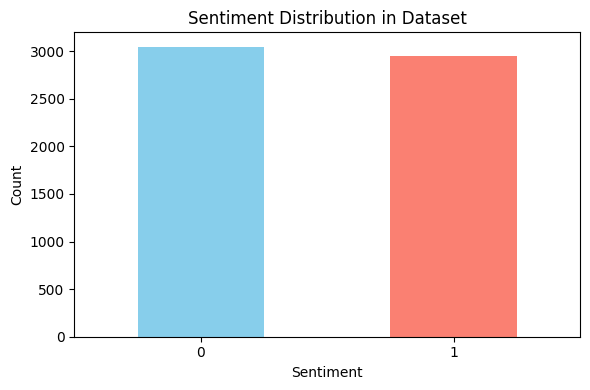

In [ ]:
# sentiment_mapping = {1: 'Positive', 0: 'Negative'}
# data['sentiment'] = data['sentiment'].map(sentiment_mapping)
# Count the occurrences of each sentiment label
sentiment_counts = data['label'].value_counts()

# Plot the counts
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Sentiment Distribution in Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

In [ ]:
data.head()

,label,text
0,1,Very slim
1,0,In my opinion she doesn't dance very well and ...
2,1,"Gym bag with nice thick cords, a divider compa..."
3,0,I bought it without knowing what the thick mat...
4,0,Bof


In [ ]:
print(X.iloc[125])  # Accessing the text at row 126


I called the customer service to help me check whether the wardrobe was made of cloth or paper. The customer service said it was made of cloth, but when it arrived, it turned out to be made of paper. Let’s not talk about the size and other details. Do you think it would be interesting to deceive us buyers? I won’t buy it again next time


In [ ]:
import re
# j = 2
def preprocess_text(text):
    # print(text)
    # j += 1
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Expand contractions
    contractions = {
        "can't": "cannot",
        "won't": "will not",
        "didn't": "did not",
        # Add more contractions as needed
    }
    for contraction, expansion in contractions.items():
        text = text.replace(contraction, expansion)

    return text

# Assuming 'data' is your DataFrame and 'text' is the column containing text data
# data['text'] = data['text'].apply(preprocess_text)


In [ ]:
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)


In [ ]:
from joblib import dump
dump(X_tfidf, 'tfidfVectorizer.joblib')

['tfidfVectorizer.joblib']

In [ ]:
type(vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [ ]:
import pickle

# Save the Tokenizer
with open('tokenizer_tfidf.pickle', 'wb') as handle:
    pickle.dump(vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Models
models = ['Naive Bayes', 'KNN', 'Random Forest', 'Decision Tree', 'SVM']
accuracies = []
conf_matrices = []


In [ ]:
# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
accuracies.append(nb_accuracy)
# print("Naive Bayes Accuracy:", nb_accuracy)
conf_matrices.append(confusion_matrix(y_test, nb_pred))

In [ ]:
# K-Nearest Neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
accuracies.append(knn_accuracy)
# print("KNN Accuracy:", knn_accuracy)
conf_matrices.append(confusion_matrix(y_test, knn_pred))

In [ ]:
# Random Forests
rf_classifier = RandomForestClassifier(n_estimators=100)  # You can adjust the number of trees
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
accuracies.append(rf_accuracy)
# print("Random Forest Accuracy:", rf_accuracy)
conf_matrices.append(confusion_matrix(y_test, rf_pred))

In [ ]:
# Decision Trees
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
accuracies.append(dt_accuracy)
# print("Decision Tree Accuracy:", dt_accuracy)
conf_matrices.append(confusion_matrix(y_test, dt_pred))

In [ ]:
# SVM classifier
svm_classifier = SVC(kernel='linear')  # You can specify different kernels such as 'linear', 'poly', 'rbf', etc.
svm_classifier.fit(X_train, y_train)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
accuracies.append(svm_accuracy)
# print("SVM Accuracy:", svm_accuracy)
conf_matrices.append(confusion_matrix(y_test, svm_pred))

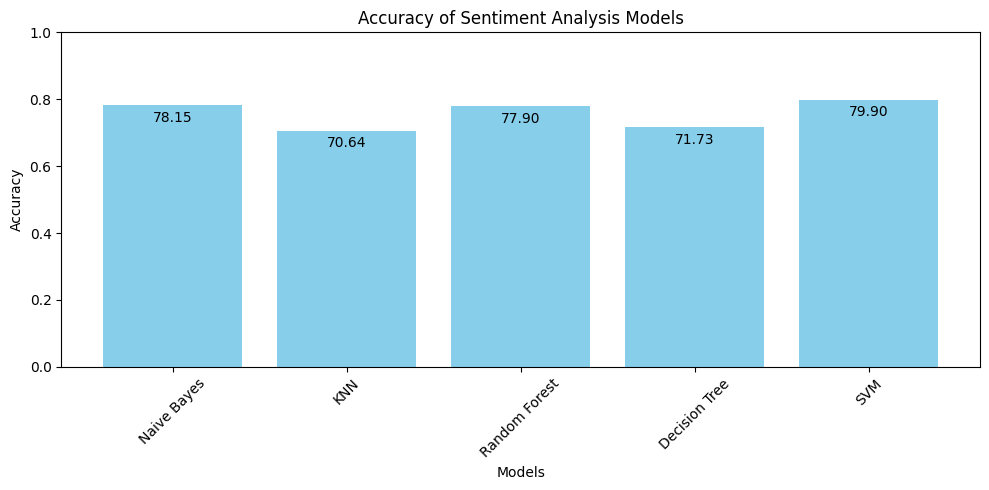

In [ ]:
# Accuracy plot
plt.figure(figsize=(10, 5))
# plt.subplot(1, 2, 1)
# plt.bar(models, accuracies, color='skynlue')
bars = plt.bar(models, accuracies, color='skyblue')

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{acc*100:.2f}', ha='center', color='black')
plt.title('Accuracy of Sentiment Analysis Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()



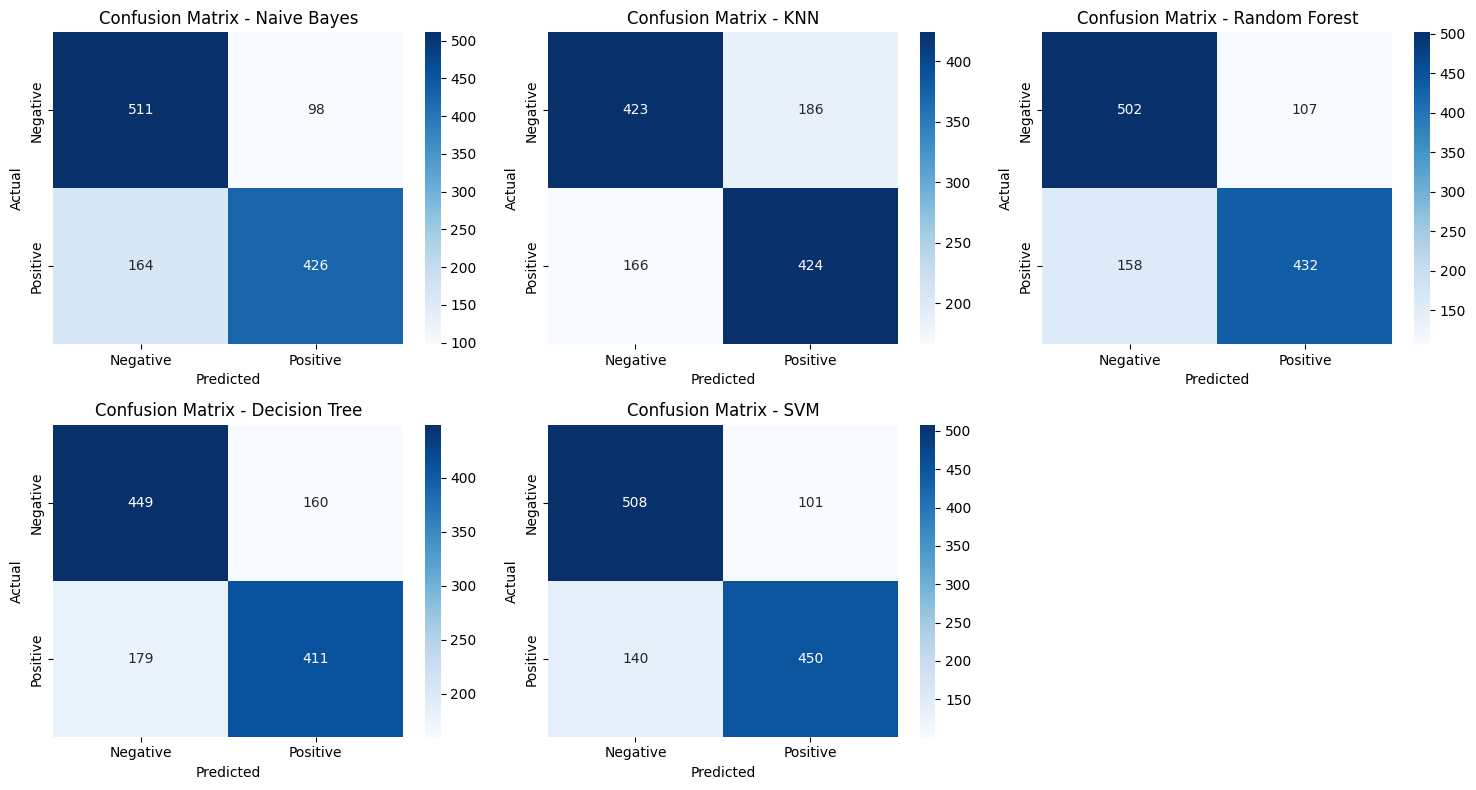

In [ ]:
# Confusion Matrix Plot
plt.figure(figsize=(15, 8))
# plt.subplot(1, 2, 2)
for i, model in enumerate(models):
    # plt.subplot(1, len(models), i + 1)
    plt.subplot(2, 3, i+1)
    sns.heatmap(conf_matrices[i], annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [ ]:

def translate_to_english(text):
    translated_text = GoogleTranslator(source='auto', target='en').translate(text)
    return translated_text

# Define the hardcoded sentences
sentences = [
    "इस फिल्म ने मुझे दुखी कर दिया",
    "मुझे ये फिल्म बहुत पसंद है",
    "यह अच्छा है",
    "मुझे वह लड़की पसंद नहीं है",
    "hello I am very happy today",
    "I am feeling very sad",
    "Ce produit est très agréable", # This product is very nice
    "tu sens si mauvais", # you smell so bad
    "i love this product very much",
    "अद्य त्वं एतावत् सुन्दरः दृश्यसे", # today you look so good
    "त्वं कुरूपः दृश्यसे" # you look ugly
]

# Define a function to perform sentiment analysis
def sentiment_analysis(text):
    # Translate the text to English
    translated_text = translate_to_english(text)

    # Vectorize the translated text using TF-IDF
    X_tfidf_translated = vectorizer.transform([translated_text])

    # Use each trained model to predict sentiment
    predictions = {}

    # Naive Bayes
    nb_pred = nb_classifier.predict(X_tfidf_translated)
    predictions['Naive Bayes'] = nb_pred[0]

    # K-Nearest Neighbors
    knn_pred = knn_classifier.predict(X_tfidf_translated)
    predictions['KNN'] = knn_pred[0]

    # Random Forests
    rf_pred = rf_classifier.predict(X_tfidf_translated)
    predictions['Random Forest'] = rf_pred[0]

    # Decision Trees
    dt_pred = dt_classifier.predict(X_tfidf_translated)
    predictions['Decision Tree'] = dt_pred[0]

    # SVM
    svm_pred = svm_classifier.predict(X_tfidf_translated)
    predictions['SVM'] = svm_pred[0]

    return predictions


# Perform sentiment analysis for each sentence
for sentence in sentences:
    predictions = sentiment_analysis(sentence)
    print(f"Sentence: {sentence}")
    for model, pred in predictions.items():
        # print(f"Predicted Sentiment using {model}: {'Positive' if pred == 1 else 'Negative'}")
        print(f"Predicted Sentiment using {model}: {'Positive' if pred == 1 else 'Negative'}")
    print()


Sentence: इस फिल्म ने मुझे दुखी कर दिया
Predicted Sentiment using Naive Bayes: Negative
Predicted Sentiment using KNN: Negative
Predicted Sentiment using Random Forest: Negative
Predicted Sentiment using Decision Tree: Negative
Predicted Sentiment using SVM: Negative

Sentence: मुझे ये फिल्म बहुत पसंद है
Predicted Sentiment using Naive Bayes: Positive
Predicted Sentiment using KNN: Positive
Predicted Sentiment using Random Forest: Positive
Predicted Sentiment using Decision Tree: Positive
Predicted Sentiment using SVM: Positive

Sentence: यह अच्छा है
Predicted Sentiment using Naive Bayes: Positive
Predicted Sentiment using KNN: Positive
Predicted Sentiment using Random Forest: Negative
Predicted Sentiment using Decision Tree: Positive
Predicted Sentiment using SVM: Positive

Sentence: मुझे वह लड़की पसंद नहीं है
Predicted Sentiment using Naive Bayes: Positive
Predicted Sentiment using KNN: Positive
Predicted Sentiment using Random Forest: Negative
Predicted Sentiment using Decision Tree